In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

/var/folders/78/16lmgb053h9gw2_n1k5r5hxr0000gn/T/ipykernel_3395/2932453242.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
prices_df = pd.read_csv("./datasets/OCEAN token price dataset.csv")

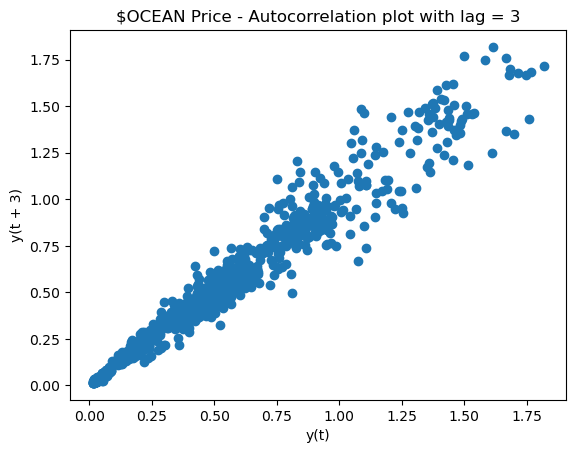

In [8]:
plt.figure()
lag_plot(prices_df['Open'], lag=3)
plt.title('$OCEAN Price - Autocorrelation plot with lag = 3')
plt.show()

In [9]:
prices_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,0.030366,0.032274,0.029264,0.030010,0.030010,409704
1,2019-05-07,0.030004,0.034073,0.029316,0.032430,0.032430,444049
2,2019-05-08,0.032356,0.032356,0.027614,0.030407,0.030407,357657
3,2019-05-09,0.030359,0.031349,0.025541,0.027187,0.027187,328438
4,2019-05-10,0.027153,0.028078,0.023804,0.024751,0.024751,345215
...,...,...,...,...,...,...,...
1480,2023-05-25,0.327049,0.334983,0.318326,0.325028,0.325028,15927755
1481,2023-05-26,0.325024,0.346889,0.324414,0.346289,0.346289,21174463
1482,2023-05-27,0.346320,0.366628,0.345204,0.350783,0.350783,33179248
1483,2023-05-28,0.350814,0.365085,0.349344,0.358697,0.358697,18058566


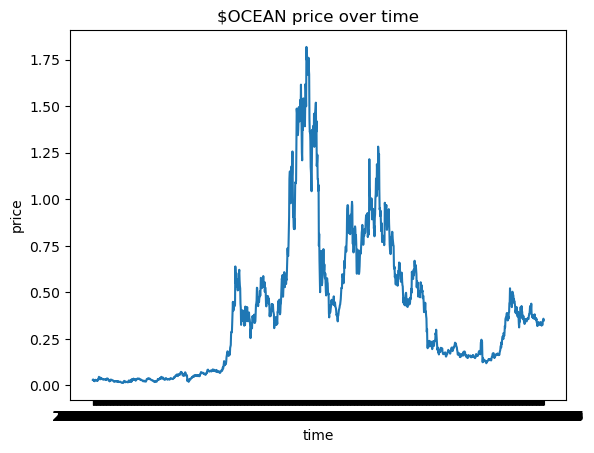

In [11]:
plt.plot(prices_df["Date"], prices_df["Close"])
# plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("$OCEAN price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [41]:
train_df, test_df = prices_df[0:int(len(prices_df)*0.7)], prices_df[int(len(prices_df)*0.7):]
training_data = train_df['Close'].values
test_data = test_df['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()#(#disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/zblanton/opt/anaconda3/envs/desights_sentiment_working/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/zblanton/opt/anaconda3/envs/desights_sentiment_working/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [40]:
test_df = prices_df[int(len(prices_df)*0.7):]

In [44]:
prediction_df = pd.DataFrame({"predictions": model_predictions, "actual": test_data, "date": test_df["Date"]})

In [45]:
prediction_df.to_csv("./derived_datasets/prediction_arma_4_1_0.csv", index=False)

In [31]:
import backtesting

/Users/zblanton/opt/anaconda3/envs/desights_sentiment_working/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/zblanton/opt/anaconda3/envs/desights_sentiment_working/lib/python3.8/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [51]:
GOOG

,Open,High,Low,Close,Volume
2004-08-19,100.00,104.06,95.96,100.34,22351900
2004-08-20,101.01,109.08,100.50,108.31,11428600
2004-08-23,110.75,113.48,109.05,109.40,9137200
2004-08-24,111.24,111.60,103.57,104.87,7631300
2004-08-25,104.96,108.00,103.88,106.00,4598900
...,...,...,...,...,...
2013-02-25,802.30,808.41,790.49,790.77,2303900
2013-02-26,795.00,795.95,784.40,790.13,2202500
2013-02-27,794.80,804.75,791.11,799.78,2026100
2013-02-28,801.10,806.99,801.03,801.20,2265800


In [53]:
help(SMA)

Help on function SMA in module backtesting.test:

SMA(arr: pandas.core.series.Series, n: int) -> pandas.core.series.Series
    Returns `n`-period simple moving average of array `arr`.



In [56]:
help(Strategy.I)

Help on function I in module backtesting.backtesting:

I(self, func: Callable, *args, name=None, plot=True, overlay=None, color=None, scatter=False, **kwargs) -> numpy.ndarray
    Declare indicator. An indicator is just an array of values,
    but one that is revealed gradually in
    `backtesting.backtesting.Strategy.next` much like
    `backtesting.backtesting.Strategy.data` is.
    Returns `np.ndarray` of indicator values.
    
    `func` is a function that returns the indicator array(s) of
    same length as `backtesting.backtesting.Strategy.data`.
    
    In the plot legend, the indicator is labeled with
    function name, unless `name` overrides it.
    
    If `plot` is `True`, the indicator is plotted on the resulting
    `backtesting.backtesting.Backtest.plot`.
    
    If `overlay` is `True`, the indicator is plotted overlaying the
    price candlestick chart (suitable e.g. for moving averages).
    If `False`, the indicator is plotted standalone below the
    candlestick ch

In [63]:
prices_df["datetime"] = pd.to_datetime(prices_df["Date"])

In [65]:
prices_df.set_index("datetime", drop=False)

,Date,Open,High,Low,Close,Adj Close,Volume,datetime
datetime,,,,,,,,
2019-05-06,2019-05-06,0.030366,0.032274,0.029264,0.030010,0.030010,409704,2019-05-06
2019-05-07,2019-05-07,0.030004,0.034073,0.029316,0.032430,0.032430,444049,2019-05-07
2019-05-08,2019-05-08,0.032356,0.032356,0.027614,0.030407,0.030407,357657,2019-05-08
2019-05-09,2019-05-09,0.030359,0.031349,0.025541,0.027187,0.027187,328438,2019-05-09
2019-05-10,2019-05-10,0.027153,0.028078,0.023804,0.024751,0.024751,345215,2019-05-10
...,...,...,...,...,...,...,...,...
2023-05-25,2023-05-25,0.327049,0.334983,0.318326,0.325028,0.325028,15927755,2023-05-25
2023-05-26,2023-05-26,0.325024,0.346889,0.324414,0.346289,0.346289,21174463,2023-05-26
2023-05-27,2023-05-27,0.346320,0.366628,0.345204,0.350783,0.350783,33179248,2023-05-27


In [50]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 10
    n2 = 20

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(GOOG, SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

/Users/zblanton/opt/anaconda3/envs/desights_sentiment_working/lib/python3.8/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
/Users/zblanton/opt/anaconda3/envs/desights_sentiment_working/lib/python3.8/site-packages/backtesting/_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


GridPlot(id='p1512', ...)

In [66]:
bt = Backtest(prices_df, SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

/var/folders/78/16lmgb053h9gw2_n1k5r5hxr0000gn/T/ipykernel_3395/3597172816.py:1: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(prices_df, SmaCross,


GridPlot(id='p2607', ...)